In [1]:
import pandas
import matplotlib
import seaborn

%matplotlib inline

In [2]:
FIG_SIZE = (6, 3)
PALETTE = seaborn.color_palette()
PAL_SEC = seaborn.color_palette('Paired')
PAL_REL = {k:v for k,v in zip(
    ['major', 'minor', 'patch', 'initial'], [PALETTE[i] for i in [3, 1, 2, 0]]
)}

In [3]:
matplotlib.rcParams['figure.figsize'] = FIG_SIZE
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

def _savefig(fig, name):
    fig.savefig(
        os.path.join(FIGURE_PATH, '{}.pdf'.format(name)),
        bbox_inches='tight'
    )

# Disable figure export
SAVEFIG = False
savefig = _savefig if SAVEFIG else lambda x, y: None

## Load data

In [4]:
df_required = (
    pandas.read_csv(
        '../data/required.csv.gz',
        parse_dates=['date'], 
        infer_datetime_format=True,   
    )
)

df_required

,package,version,major,minor,patch,kind,rank,date,rank_date,backported,backported_from
0,0x.js,0.6.1,0.0,6.0,1.0,initial,1,2017-06-20 07:07:49,1,False,NaN
1,0x.js,0.6.2,0.0,6.0,2.0,patch,2,2017-06-21 13:37:13,2,False,NaN
2,0x.js,0.7.0,0.0,7.0,0.0,minor,3,2017-06-22 23:20:18,3,False,NaN
3,0x.js,0.7.1,0.0,7.0,1.0,patch,4,2017-06-26 22:31:57,4,False,NaN
4,0x.js,0.8.0,0.0,8.0,0.0,minor,5,2017-07-05 02:01:37,5,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
157734,zxcvbn,4.2.0,4.0,2.0,0.0,minor,21,2015-11-20 21:54:26,21,False,NaN
157735,zxcvbn,4.3.0,4.0,3.0,0.0,minor,22,2016-05-04 02:26:38,22,False,NaN
157736,zxcvbn,4.4.0,4.0,4.0,0.0,minor,23,2016-09-24 23:55:01,23,False,NaN
157737,zxcvbn,4.4.1,4.0,4.0,1.0,patch,24,2016-10-31 22:00:41,24,False,NaN


In [5]:
df_dependents = (
    pandas.read_csv(
        '../data/dependents.csv.gz',
        parse_dates=['date'],
        infer_datetime_format=True,
    )
)

df_dependents

,source,version,date,target,constraint,interval,selected,c_empty,c_dev,c_major,c_minor,c_patch
0,0-1-project,0.0.1,2018-12-10 06:44:08,chai,^4.2.0,"[4.2.0,5.0.0)",71.0,False,False,False,True,True
1,0-1-project,0.0.1,2018-12-10 06:44:08,vue,^2.5.17,"[2.5.17,3.0.0)",144.0,False,False,False,True,True
2,0-1-project,0.0.1,2018-12-10 06:44:08,vue-hot-reload-api,^2.3.1,"[2.3.1,3.0.0)",30.0,False,False,False,True,True
3,0-1-project,0.0.1,2018-12-10 06:44:08,vue-template-compiler,^2.5.17,"[2.5.17,3.0.0)",60.0,False,False,False,True,True
4,00.demo,1.0.0,2018-08-11 02:15:29,chalk,^2.1.0,"[2.1.0,3.0.0)",23.0,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
736567,zzzd,1.0.0,2018-08-10 08:32:47,vuedraggable,^2.16.0,"[2.16.0,3.0.0)",25.0,False,False,False,True,True
736568,zzzd,1.0.0,2018-08-10 08:32:47,vuex,^3.0.1,"[3.0.1,4.0.0)",32.0,False,False,False,True,True
736569,zzzzhy,1.0.4,2018-07-09 09:16:20,react,^16.4.0,"[16.4.0,17.0.0)",84.0,False,False,False,True,True
736570,zzzzhy,1.0.4,2018-07-09 09:16:20,react-dom,^16.4.0,"[16.4.0,17.0.0)",52.0,False,False,False,True,True


## Dataset overview

### Some statistics

In [6]:
print('Number of required packages:', len(df_required.drop_duplicates('package')))
print('Number of releases:', len(df_required))
print('Oldest release:', df_required.date.min())
print()
print('Number of dependent packages:', len(df_dependents.drop_duplicates('source')))
print('Number of dependencies:', len(df_dependents))
print()
print('Number of backports:', len(df_required[lambda d: d['backported']]))
print('Number of packages with backports:', len(df_required[lambda d: d['backported']].drop_duplicates('package')))
print()
print('Initial development releases:', len(df_required[lambda d: d['major'] == 0]))
print('Packages < 1.0.0:', len(df_required.groupby('package', sort=False).agg({'major': 'max'})[lambda d: d['major'] == 0]))

Number of required packages: 4451
Number of releases: 157739
Oldest release: 2010-11-09 23:36:08

Number of dependent packages: 169455
Number of dependencies: 736572

Number of backports: 3010
Number of packages with backports: 432

Initial development releases: 53045
Packages < 1.0.0: 762


### Number of dependents

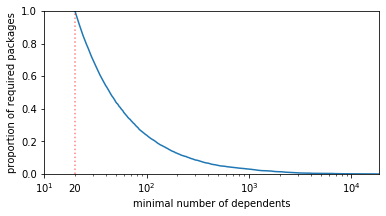

In [7]:
fig, ax = matplotlib.pyplot.subplots()

data = (
    df_dependents
    .groupby('target')
    [['source']]
    .count()
    .assign(target=1)
    .sort_values('source', ascending=False)
    .groupby('source', sort=False)
    .sum()
    .cumsum()
    .pipe(lambda df: df / df_dependents.target.nunique())
)

data.plot(legend=False, color=PALETTE[0], ax=ax)
ax.axvline(20, 0, 1, linestyle=':', color='r', alpha=0.5)
ax.text(20, -0.06, '20', va='top', ha='center')

ax.set(
    xlabel='minimal number of dependents',
    xscale='log',
    xlim=(10, None),
    ylabel='proportion of required packages',
    ylim=(0, 1),
)
ax.acorr
savefig(fig, 'overview_dependents')

In [8]:
pandas.concat(
    (data.reset_index()[lambda d: d['target'] >= p].iloc[0] for p in pandas.np.arange(0, 1, 0.1)),
    axis=1
).T.set_index('target').T

target,0.000225,0.100427,0.201977,0.302404,0.402831,0.509548,0.609077,0.700966,0.820714,0.918670
source,18523.0,259.0,121.0,77.0,56.0,43.0,35.0,30.0,25.0,22.0


### Evolution of the number of considered required packages

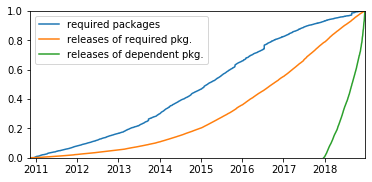

In [9]:
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(FIG_SIZE)

data = (
    df_required
    .sort_values('rank_date')
    .drop_duplicates('package', keep='first')
    .groupby('date')
    [['package']]
    .count()
    .cumsum()
    .pipe(lambda df: df / len(df_required.drop_duplicates('package')))
    .rename(columns={'package': 'required packages'})
    .plot(color=PALETTE[0], ax=ax)
)

(
    df_required
    .groupby('date')
    [['version']]
    .count()
    .cumsum()
    .pipe(lambda df: df / len(df_required))
    .rename(columns={'version': 'releases of required pkg.'})
    .plot(color=PALETTE[1], ax=ax)
)

(
    df_dependents
    .groupby('date')
    [['source']]
    .count()
    .cumsum()
    .pipe(lambda df: df / len(df_dependents))
    .rename(columns={'source': 'releases of dependent pkg.'})
    .plot(color=PALETTE[2], ax=ax)
)

ax.set(
    xlabel='',
    ylabel='',
    ylim=(0, 1)
)
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')

savefig(fig, 'overview_required')

## How frequently are packages updated?

### Time between releases

Initial development releases (0.y.z) are excluded. 

In [10]:
data = []

for kind in ['major', 'minor', 'patch', 'initial']:
    if kind == 'major':
        restricted = ['major']
    elif kind == 'minor':
        restricted = ['major', 'minor']
    elif kind == 'patch' or kind == 'initial':
        restricted = ['major', 'minor', 'patch']
        
    _ = (
        df_required
        [lambda d: d['major'] != 0]
        [['package', 'rank', 'version', 'kind', 'rank_date', 'date']]
        .sort_values('rank')
        # Find next update
        .pipe(lambda df: pandas.merge_asof(
            left=df[lambda d: d['kind'] == kind], 
            right=(
                df
                [lambda d: d['kind'].isin(restricted)]
                .assign(rank_next=lambda d: d['rank'])
            ),
            by='package',
            on='rank',
            allow_exact_matches=False,
            direction='forward',
            suffixes=('', '_next'),
        ))
        .dropna(subset=['rank_next'])
    )
    
    data.append(_)

data = (
    pandas.concat(data, axis=0, sort=False)
    .assign(
        delay=lambda d: (d['date_next'] - d['date']).dt.days / 30,
        update=lambda d: d['rank_next'] - d['rank'] - 1,
    )
    .sort_values(['package', 'rank'])
)

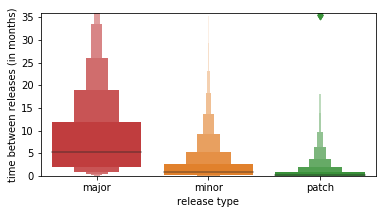

In [11]:
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(FIG_SIZE)

seaborn.boxenplot(
    x='kind',
    y='delay',
    data=data,
    order=['major', 'minor', 'patch'],
    palette=PAL_REL,
    ax=ax,
)

ax.set(
    xlabel='release type', 
    ylabel='time between releases (in months)',
    ylim=(0, 36),
)

savefig(fig, 'freq_time_releases')

In [12]:
data.groupby('kind')[['delay', 'update']].describe().T

kind              initial        major         minor         patch
delay  count  1559.000000  5033.000000  22986.000000  67621.000000
       mean      1.991255     8.541254      2.413405      0.890659
       std       5.886762     9.804340      4.562398      2.753582
       min     -90.533333   -43.233333    -66.133333    -55.466667
       25%       0.000000     1.833333      0.233333      0.000000
       50%       0.133333     5.200000      0.900000      0.166667
       75%       1.316667    11.766667      2.666667      0.733333
       max      56.133333    79.500000     75.000000     74.700000
update count  1559.000000  5033.000000  22986.000000  67621.000000
       mean      0.000000     8.488973      1.864657      0.000000
       std       0.000000    14.066569     10.756663      0.000000
       min       0.000000     0.000000      0.000000      0.000000
       25%       0.000000     1.000000      0.000000      0.000000
       50%       0.000000     4.000000      1.000000      0.000000
       75%       0.000000    10.000000      2.000000      0.000000
       max       0.000000   314.000000   1215.000000      0.000000

### Average time between releases

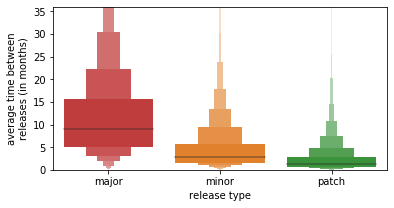

In [13]:
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(FIG_SIZE)

seaborn.boxenplot(
    x='kind',
    y='delay',
    data=(
        data
        .groupby(['package', 'kind'], sort=False, as_index=False)
        .mean()
    ),
    order=['major', 'minor', 'patch'],
    palette=PAL_REL,
    ax=ax,
)

ax.set(
    xlabel='release type', 
    ylabel='average time between\nreleases (in months)',
    ylim=(0, 36),
)

savefig(fig, 'freq_package_time_releases')

In [14]:
(
    data
    .groupby(['package', 'kind'], sort=False, as_index=False)
    .mean()
    .groupby('kind')[['delay', 'update']]
    .describe()
    .T
)

kind              initial        major        minor        patch
delay  count  1559.000000  1826.000000  2664.000000  3208.000000
       mean      1.991255    11.924481     4.739523     2.458305
       std       5.886762    10.398760     5.587899     3.829473
       min     -90.533333   -18.150000   -15.200000    -4.500000
       25%       0.000000     5.050833     1.555556     0.547238
       50%       0.133333     9.108333     2.933333     1.310932
       75%       1.316667    15.558333     5.783333     2.850000
       max      56.133333    79.500000    67.166667    59.233333
update count  1559.000000  1826.000000  2664.000000  3208.000000
       mean      0.000000     9.595264     2.045599     0.000000
       std       0.000000    14.273836     5.637915     0.000000
       min       0.000000     0.000000     0.000000     0.000000
       25%       0.000000     2.333333     0.500000     0.000000
       50%       0.000000     5.055556     1.068966     0.000000
       75%       0.000000    11.729167     2.287202     0.000000
       max       0.000000   314.000000   233.000000     0.000000

### Major frequency (time and updates)

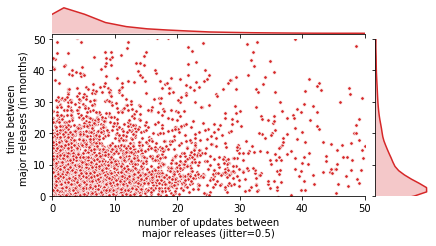

In [15]:
g = seaborn.JointGrid(
    x='update',
    y='delay',
    data=(
        data
        [lambda d: d['kind'] == 'major']
        .assign(
            delay=lambda d: d['delay'] + pandas.np.random.rand(d.shape[0]) - 0.5,
            update=lambda d: d['update'] + pandas.np.random.rand(d.shape[0]) - 0.5,
        )
    ),
    xlim=(0, 50),
    ylim=(0, 50)
)
g.plot_joint(seaborn.scatterplot, color=PAL_REL['major'], marker='.', s=50)
g.plot_marginals(seaborn.kdeplot, color=PAL_REL['major'], shade=True)

g.fig.set_size_inches(FIG_SIZE)

g.ax_joint.set(
    xlabel='number of updates between\nmajor releases (jitter=0.5)',
    ylabel='time between\nmajor releases (in months)',
)

savefig(g.fig, 'freq_major')

In [16]:
(
    data
    [lambda d: d['kind'] == 'major']
    [['delay', 'update']]
    .describe()
    .T
)

,count,mean,std,min,25%,50%,75%,max
delay,5033.0,8.541254,9.804340,-43.233333,1.833333,5.2,11.766667,79.5
update,5033.0,8.488973,14.066569,0.000000,1.000000,4.0,10.000000,314.0


### Major frequency vs. update frequency (per package)

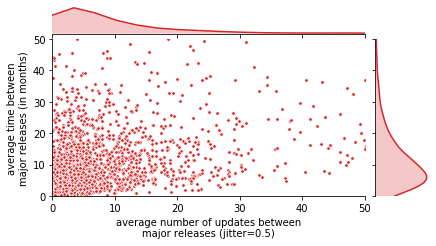

In [17]:

g = seaborn.JointGrid(
    x='update',
    y='delay',
    data=(
        data
        [lambda d: d['kind'] == 'major']
        .assign(
            delay=lambda d: d['delay'] + pandas.np.random.rand(d.shape[0]) - 0.5,
            update=lambda d: d['update'] + pandas.np.random.rand(d.shape[0]) - 0.5,
        )
        .groupby(['package', 'kind'], sort=False, as_index=False)
        .mean()
    ),
    xlim=(0, 50),
    ylim=(0, 50)
)
g.plot_joint(seaborn.scatterplot, color=PAL_REL['major'], marker='.', s=50)
g.plot_marginals(seaborn.kdeplot, color=PAL_REL['major'], shade=True)

g.fig.set_size_inches(FIG_SIZE)
g.ax_joint.set(
    xlabel='average number of updates between\nmajor releases (jitter=0.5)',
    ylabel='average time between\nmajor releases (in months)',
)

savefig(g.fig, 'freq_package_major')

In [18]:
(
    data
    [lambda d: d['kind'] == 'major']
    .groupby(['package', 'kind'], sort=False, as_index=False)
    [['delay', 'update']]
    .mean()
    .describe()
    .T
)

,count,mean,std,min,25%,50%,75%,max
delay,1826.0,11.924481,10.398760,-18.15,5.050833,9.108333,15.558333,79.5
update,1826.0,9.595264,14.273836,0.00,2.333333,5.055556,11.729167,314.0


### Stability index

(1 - nb major / nb update) / (time between update)???


## How many versions are required?

### Softness of dependency constraints

### Number of available/required versions

### Number of required packages w.r.t. required versions

### Reuse index

e.g. Gini index dependents:releases

### Release type of required versions

e.g. latest, a previous major, a previous minor, a previous patch.

### Time lag of required versions

### Number of available/required major

### Number of required packages w.r.t. number of required majors

### Major reuse index

e.g. Gini index dependents:major

## How prevalent are backports?

### Number of packages with backports

### Number of backported releases

### Relation with number of required major?

### Backport coverage

e.g. proportion of dependents using either the highest major or a major with a backport

## Relation between metrics

### Correlation between metrics

## Which releases are backported?

### Type of backports

### Type of backported releases

## How long to backport releases?

In terms of time and #updates.

### Since last update, compared to other releases

### Since latest major

e.g. since 3.0.0 for a 2.0.1 backport, assuming 3.2.1 is latest.

### Since last release in current major

e.g. since 2.0.0 for a 2.0.1 backport, assuming 2.0.0 was the latest before 3.0.0.

## Tooling & metrics

### Tool: Show library usage

### Tool: Show update "impact"